# Zerobase EDA 4일차
## 유가 데이터 분석

### 한글 깨짐 방지

Text(0.5, 1.0, '데이터 사이언스')

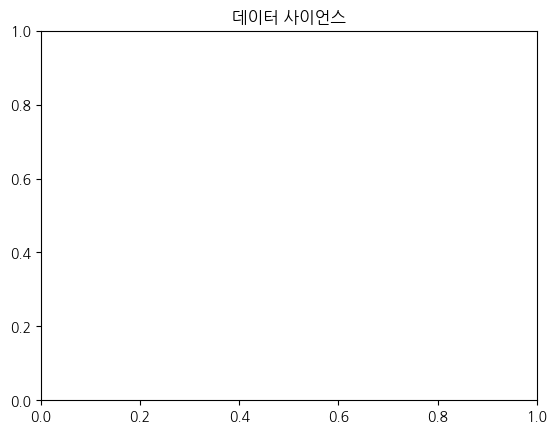

In [1]:
import koreanize_matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.title('데이터 사이언스')

### Selenium 설치

In [2]:
!pip install selenium

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Chrome Driver 설치
* 지금 Chrome 최신 버전이 122이기 때문에 영상 강의와는 다르게 설치해야함
* 링크 - https://googlechromelabs.github.io/chrome-for-testing/#stable
-> 하지만 최신 selenium에서 크롬드라이버의 설치가 필요가 없어졌다.

### webdriver 사용

In [33]:
# 확인
# 크롬 드라이버의 설치가 필요가 없어졌기 때문에 Chrome()에 빈 상태로 놔둬도 실행이 됨
from selenium import webdriver

driver = webdriver.Chrome()
# 접근하고 싶은 주소 지정
driver.get('https://pinkwink.kr')

In [32]:
# 종료
driver.quit()

In [34]:
# 화면 최대 크기 설정
driver.maximize_window()


In [35]:
# 화면 최소 크기 설정
driver.minimize_window()

In [36]:
# 화면 크기 설정
driver.set_window_size(600, 600)

In [37]:
# 새로 고침
driver.refresh()

In [38]:
# 뒤로 가기
driver.back()

In [39]:
# 앞으로 가기
driver.forward()

In [40]:
# 클릭
from selenium.webdriver.common.by import By

# 해당 html 태그를 개발자 도구에서 가져오기
first_content = driver.find_element(By.CSS_SELECTOR, '#content > div.cover-masonry > div > ul > li:nth-child(1)')
first_content.click()

In [41]:
# 새로운 탭 생성
driver.execute_script('window.open("https://www.naver.com")')

In [27]:
# 탭 이동 -> 인덱스 번호로 탭 이동 가능
driver.switch_to.window(driver.window_handles[0])

In [28]:
# 탭 닫기
driver.close()

In [42]:
# 화면 스크롤 -> 자바 스크립트 언어 사용(스크롤 가능한 높이(길이))
# 화면의 크기가 변할 수록 값도 달라짐
driver.execute_script('return document.body.scrollHeight')

7526

In [43]:
# 화면 스크롤 하단 이동
driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')

In [44]:
# 현재 보이는 화면 스크린샷 저장
driver.save_screenshot('last_page.png')

True

In [45]:
# 화면 스크롤 상단 이동
driver.execute_script('window.scrollTo(0, 0);')

In [48]:
# 특정 태그 지점까지 스크롤 이동
from selenium.webdriver import ActionChains

some_tag = driver.find_element(By.CSS_SELECTOR, '#content > div.cover-list > div > ul > li:nth-child(1)')
action = ActionChains(driver)
action.move_to_element(some_tag).perform()

### 검색어 입력

In [55]:
driver = webdriver.Chrome()
driver.get('https://www.naver.com')

In [50]:
# 검색창 css를 가져와서 검색창에 글자를 넣기
# 다시 다른 글자로 실행하면 글씨가 덧붙여서 나옴 -> clear() 실행한 다음 다시 실행
keyword = driver.find_element(By.CSS_SELECTOR, '#query')
keyword.send_keys('파이썬')
# keyword.clear()
# keyword.send_keys('딥러닝')

In [51]:
# 검색하기
search_btn = driver.find_element(By.CSS_SELECTOR, '#search-btn')
search_btn.click()

#### 다른 방법

XPATH
* //: 최상위
* *: 자손 태그
* /: 자식 태그

In [52]:
driver.find_element(By.XPATH, '//*[@id="query"]').send_keys('xpath')

In [53]:
driver.find_element(By.XPATH, '//*[@id="search-btn"]').click()

In [54]:
driver.quit()

### selenium + beautifulsoup

'<html lang="ko" class="fzoom" data-dark="false"><head><script async="" src="https://ntm.pstatic.net/ex/nlog.js"></script><script async="" src="https://ntm.pstatic.net/scripts/ntm_27291e35193e.js"></script><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content=
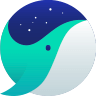
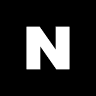

In [56]:
# 현재 화면의 html 코드 가져오기
driver.page_source

In [57]:
from bs4 import BeautifulSoup

req = driver.page_source
soup = BeautifulSoup(req, 'html.parser')

In [58]:
# 특정 id나 클래스 내용 가져오기
soup.select('#search_area')

[<div class="search_area" id="search_area"> <div class="link_search_special" id="special-input-logo-ex" style="display:none"></div> <div class="search_group"> <div class="search_group_inner" id="search"> <h1 class="search_logo" id="special-input-logo"><a class="link_naver type_motion_hat is_fadeout" href="/"><img alt="NAVER" height="58" src="https://s.pstatic.net/static/www/mobile/edit/20230516_0/upload_1684217675277OZzsu.gif" width="58"/></a><a class="link_naver type_motion_n is_fadein" href="/"><span class="ico_n_logo_svg"><svg fill="none" viewbox="0 0 24 24" xmlns="http://www.w3.org/2000/svg"><path d="M16.273 12.845 7.376 0H0v24h7.727V11.155L16.624 24H24V0h-7.727v12.845z"></path></svg></span><span class="blind">NAVER</span></a></h1> <form action="https://search.naver.com/search.naver" id="sform" method="get" name="search" role="search"> <fieldset> <legend class="blind">검색</legend> <input name="where" type="hidden" value="nexearch"/> <input id="sm" name="sm" type="hidden" value="top_

## 데이터 수집

데이터 출처 - 주유소 찾기 오피넷(https://www.opinet.co.kr/user/main/mainView.do)
* 목표 데이터는 브랜드, 가격, 셀프 주유 여부, 위치
* 지역에서 광역시도와 시구 정보를 입력하면 지도가 바뀌고, 잠시 후 주유소 정보가 로딩
* 엑셀파일에는 원하는 정보가 있어서 다운로드 가능

하지만 지역을 선택해도 드러난 웹 주소가 변경되지 않는다..<br>
HTML 소스에서 원하는 정보를 얻는 것도 쉬워보이지는 않음..

### 목표
* 서울시 주유소를 대상으로 셀프 주유소가 저렴한지 확인
* Beautiful Soup으로는 바로 접근하기 어려워 보이니 Selenium으로 접근

In [59]:
# import time
# url로 접속
# 간혹 메인페이지로 접속이 되고, 팝업창이 하나 나옴
# -> 팝업창 화면을 전환 후 닫아줘야함 -> driver.switch_to_window(driver.window_handles[-1]) -> driver.close()
# 그리고, 다시 실행시키면 원하는 페이지로 이동 -> driver.switch_to_window(driver.window_handles[-1]) -> driver.get(url)
# 하지만 연속으로 실행시키다보면 에러가 발생함 -> time 모듈을 사용해서 time.sleep()으로 약간의 텀을 지정(사람처럼 작동하게)
from selenium import webdriver

url = 'https://www.opinet.co.kr/searRgSelect.do'
driver = webdriver.Chrome()
driver.get(url)

In [60]:
# 지역: 시/도 다루기
# 시/도를 선택하는 태그를 가져오기
sido_list = driver.find_element(By.ID, 'SIDO_NM0')
sido_list.text


'            시/도\n            \n             \n             \n              서울\n             \n            \n             \n             \n              부산\n             \n            \n             \n             \n              대구\n             \n            \n             \n             \n              인천\n             \n            \n             \n             \n              광주\n             \n            \n             \n             \n              대전\n             \n            \n             \n             \n              울산\n             \n            \n             \n             \n              세종\n             \n            \n             \n              경기\n             \n             \n            \n             \n             \n              강원\n             \n            \n             \n             \n              충북\n             \n            \n             \n             \n              충남\n             \n            \n             \n             \n              

In [61]:
# id가 있던 태그에 option이라는 태그 안에 광역시도의 값을 받아오기
sido = sido_list.find_elements(By.TAG_NAME, 'option')
len(sido), sido[1].text

(18, '서울')

In [62]:
# option 태그의 value 이름을 가져오기 -> 맨 앞 칸이 빈 칸
sido_names = [option.get_attribute('value') for option in sido]
sido_names[:5]

['', '서울특별시', '부산광역시', '대구광역시', '인천광역시']

In [63]:
# 빈 칸 제거
sido_names = sido_names[1:]
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전북특별자치도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

이제 값을 얻어 왔으니 박스의 내용을 계속 바꿔야함


In [64]:
# sido_list 변수에 리스트 결과 값을 저장한 sido_names의 값을 send_keys를 이용해서 보내면 됨
# 관심 지역은 서울이니 서울로 고정
sido_list.send_keys(sido_names[0])

In [65]:
# 지역: 구 다루기
# 구를 선택하는 태그를 가져오기
# 시/도와 마찬가지 방법

gu_list = driver.find_element(By.ID, 'SIGUNGU_NM0')
gu = gu_list.find_elements(By.TAG_NAME, 'option') 

gu_names = [option.get_attribute("value") for option in gu]
gu_names = gu_names[1:]
gu_names, len(gu_names)

(['강남구',
  '강동구',
  '강북구',
  '강서구',
  '관악구',
  '광진구',
  '구로구',
  '금천구',
  '노원구',
  '도봉구',
  '동대문구',
  '동작구',
  '마포구',
  '서대문구',
  '서초구',
  '성동구',
  '성북구',
  '송파구',
  '양천구',
  '영등포구',
  '용산구',
  '은평구',
  '종로구',
  '중구',
  '중랑구'],
 25)

### 그럼 이제 모든 구의 데이터의 엑셀을 저장하자

In [66]:
!pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
# 진행 상황을 tqdm으로 확인
import time 
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element(By.ID, 'SIGUNGU_NM0')
    element.send_keys(gu)
    time.sleep(3)
    
    # 엑셀 저장 태그의 id를 가져오기
    element_get_excel = driver.find_element(By.ID, 'glopopd_excel').click()
    time.sleep(3)

C:\Users\emddj\AppData\Local\Temp\ipykernel_15568\3442318494.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names):


  0%|          | 0/25 [00:00<?, ?it/s]

In [68]:
driver.close()

## 데이터 전처리

In [69]:
import pandas as pd 
from glob import glob 

# 파일 목록 한 번에 가져오기
glob('data/지역_*.xls')

['data\\지역_위치별(주유소) (1).xls',
 'data\\지역_위치별(주유소) (10).xls',
 'data\\지역_위치별(주유소) (11).xls',
 'data\\지역_위치별(주유소) (12).xls',
 'data\\지역_위치별(주유소) (13).xls',
 'data\\지역_위치별(주유소) (14).xls',
 'data\\지역_위치별(주유소) (15).xls',
 'data\\지역_위치별(주유소) (16).xls',
 'data\\지역_위치별(주유소) (17).xls',
 'data\\지역_위치별(주유소) (18).xls',
 'data\\지역_위치별(주유소) (19).xls',
 'data\\지역_위치별(주유소) (2).xls',
 'data\\지역_위치별(주유소) (20).xls',
 'data\\지역_위치별(주유소) (21).xls',
 'data\\지역_위치별(주유소) (22).xls',
 'data\\지역_위치별(주유소) (23).xls',
 'data\\지역_위치별(주유소) (24).xls',
 'data\\지역_위치별(주유소) (3).xls',
 'data\\지역_위치별(주유소) (4).xls',
 'data\\지역_위치별(주유소) (5).xls',
 'data\\지역_위치별(주유소) (6).xls',
 'data\\지역_위치별(주유소) (7).xls',
 'data\\지역_위치별(주유소) (8).xls',
 'data\\지역_위치별(주유소) (9).xls',
 'data\\지역_위치별(주유소).xls']

In [70]:
station_files = glob('data/지역_*.xls')
station_files[:5]

['data\\지역_위치별(주유소) (1).xls',
 'data\\지역_위치별(주유소) (10).xls',
 'data\\지역_위치별(주유소) (11).xls',
 'data\\지역_위치별(주유소) (12).xls',
 'data\\지역_위치별(주유소) (13).xls']

In [72]:
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---------------------------------------- 96.5/96.5 kB 5.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
import pandas as pd
# 하나만 읽어보기
tmp = pd.read_excel(station_files[0], header=2)
tmp.tail(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
12,서울특별시,천호현대주유소,서울 강동구 천중로 67 (천호동),HD현대오일뱅크,02-484-9323,N,-,1843,1743,-
13,서울특별시,광성주유소,서울 강동구 올림픽로 673 (천호동),S-OIL,02-470-5133,N,-,1968,1858,1800


In [74]:
# 전체 파일을 읽기
tmp_raw = [] 
for file_name in station_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

In [75]:
# 형식이 동일하고 연달아 붙이기만 하면 될 때는 concat 명령 사용
stations_raw = pd.concat(tmp_raw)
stations_raw

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),HD현대오일뱅크,02-487-2030,Y,-,1649,1549,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),HD현대오일뱅크,02-441-0536,N,-,1654,1565,-
2,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,1665,1575,1500
3,서울특별시,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-6956-6674,Y,1896,1686,1588,1590
4,서울특별시,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),GS칼텍스,02-441-3327,Y,1895,1695,1595,1599
...,...,...,...,...,...,...,...,...,...,...
27,서울특별시,(주)소모 쎈트럴주유소,서울 강남구 삼성로 335,GS칼텍스,02-565-0267,N,2385,2195,2086,1650
28,서울특별시,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,HD현대오일뱅크,02-543-1154,N,2397,2198,1998,-
29,서울특별시,SK논현주유소,서울 강남구 논현로 747 (논현동),SK에너지,02-511-0955,N,2690,2450,2295,1798
30,서울특별시,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,HD현대오일뱅크,02-518-5631,N,2850,2580,2430,-


In [76]:
stations_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 0 to 31
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      439 non-null    object
 1   상호      439 non-null    object
 2   주소      439 non-null    object
 3   상표      439 non-null    object
 4   전화번호    439 non-null    object
 5   셀프여부    439 non-null    object
 6   고급휘발유   439 non-null    object
 7   휘발유     439 non-null    object
 8   경유      439 non-null    object
 9   실내등유    439 non-null    object
dtypes: object(10)
memory usage: 37.7+ KB


In [77]:
# 원하는 컬럼의 정보들만 읽어들이기
stations = pd.DataFrame({
    "상호": stations_raw["상호"],
    "주소": stations_raw["주소"], 
    "가격": stations_raw["휘발유"],
    "셀프": stations_raw["셀프여부"],
    "상표": stations_raw["상표"]
})
stations.head()

,상호,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1649,Y,HD현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1654,N,HD현대오일뱅크
2,방아다리주유소,서울 강동구 동남로 811 (명일동),1665,Y,SK에너지
3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1686,Y,GS칼텍스
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1695,Y,GS칼텍스


In [78]:
# 주소에 있는 구만 뽑아서 다시 컬럼에 저장
stations["구"] = [eachAddress.split()[1] for eachAddress in stations["주소"]]
stations

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1649,Y,HD현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1654,N,HD현대오일뱅크,강동구
2,방아다리주유소,서울 강동구 동남로 811 (명일동),1665,Y,SK에너지,강동구
3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1686,Y,GS칼텍스,강동구
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1695,Y,GS칼텍스,강동구
...,...,...,...,...,...,...
27,(주)소모 쎈트럴주유소,서울 강남구 삼성로 335,2195,N,GS칼텍스,강남구
28,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2198,N,HD현대오일뱅크,강남구
29,SK논현주유소,서울 강남구 논현로 747 (논현동),2450,N,SK에너지,강남구
30,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2580,N,HD현대오일뱅크,강남구


In [79]:
# 지금 데이터는 정상적으로 다 담겨있지만, 다르게 되어있을 경우 수정해주자
stations['구'].unique(), len(stations['구'].unique())

(array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
        '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
        '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object),
 25)

In [80]:
# 가격 데이터형 변환 object => float 
stations["가격"] = stations["가격"].astype("float")

ValueError: could not convert string to float: '-'

가격 정보가 없는 것이 '-' 이렇게 표시되어서 오류가 발생 -> 뭔가 조치 필요

In [81]:
# 가격 정보 없는 주유소를 표시
stations[stations["가격"] == "-"]

,상호,주소,가격,셀프,상표,구
12,태양주유소,서울 광진구 동일로 345 (중곡동),-,N,HD현대오일뱅크,광진구


In [82]:
# 가격 정보가 있는 주유소만 사용  -> 가격 정보가 없는 정보는 제거
stations = stations[stations["가격"] != "-"]
stations.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1649,Y,HD현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1654,N,HD현대오일뱅크,강동구
2,방아다리주유소,서울 강동구 동남로 811 (명일동),1665,Y,SK에너지,강동구
3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1686,Y,GS칼텍스,강동구
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1695,Y,GS칼텍스,강동구


In [83]:
# 가격 정보가 없는 행 하나 제거됨
stations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, 0 to 31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      438 non-null    object
 1   주소      438 non-null    object
 2   가격      438 non-null    object
 3   셀프      438 non-null    object
 4   상표      438 non-null    object
 5   구       438 non-null    object
dtypes: object(6)
memory usage: 24.0+ KB


In [84]:
# 다시 가격 데이터형 변환 object => float
stations["가격"] = stations["가격"].astype("float")

C:\Users\emddj\AppData\Local\Temp\ipykernel_15568\1233607340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations["가격"] = stations["가격"].astype("float")


In [85]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, 0 to 31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      438 non-null    object 
 1   주소      438 non-null    object 
 2   가격      438 non-null    float64
 3   셀프      438 non-null    object 
 4   상표      438 non-null    object 
 5   구       438 non-null    object 
dtypes: float64(1), object(5)
memory usage: 24.0+ KB


In [86]:
# 인덱스 재정렬 
stations.reset_index(inplace=True)
stations.head()

,index,상호,주소,가격,셀프,상표,구
0,0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1649.0,Y,HD현대오일뱅크,강동구
1,1,구천면주유소,서울 강동구 구천면로 357 (암사동),1654.0,N,HD현대오일뱅크,강동구
2,2,방아다리주유소,서울 강동구 동남로 811 (명일동),1665.0,Y,SK에너지,강동구
3,3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1686.0,Y,GS칼텍스,강동구
4,4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1695.0,Y,GS칼텍스,강동구


In [87]:
# 필요없는 index라는 컬럼 제거
del stations["index"]
stations.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1649.0,Y,HD현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1654.0,N,HD현대오일뱅크,강동구
2,방아다리주유소,서울 강동구 동남로 811 (명일동),1665.0,Y,SK에너지,강동구
3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1686.0,Y,GS칼텍스,강동구
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1695.0,Y,GS칼텍스,강동구


In [88]:
stations

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1649.0,Y,HD현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1654.0,N,HD현대오일뱅크,강동구
2,방아다리주유소,서울 강동구 동남로 811 (명일동),1665.0,Y,SK에너지,강동구
3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1686.0,Y,GS칼텍스,강동구
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1695.0,Y,GS칼텍스,강동구
...,...,...,...,...,...,...
433,(주)소모 쎈트럴주유소,서울 강남구 삼성로 335,2195.0,N,GS칼텍스,강남구
434,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2198.0,N,HD현대오일뱅크,강남구
435,SK논현주유소,서울 강남구 논현로 747 (논현동),2450.0,N,SK에너지,강남구
436,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2580.0,N,HD현대오일뱅크,강남구


## 데이터 시각화

<Axes: title={'center': '가격'}, xlabel='셀프'>

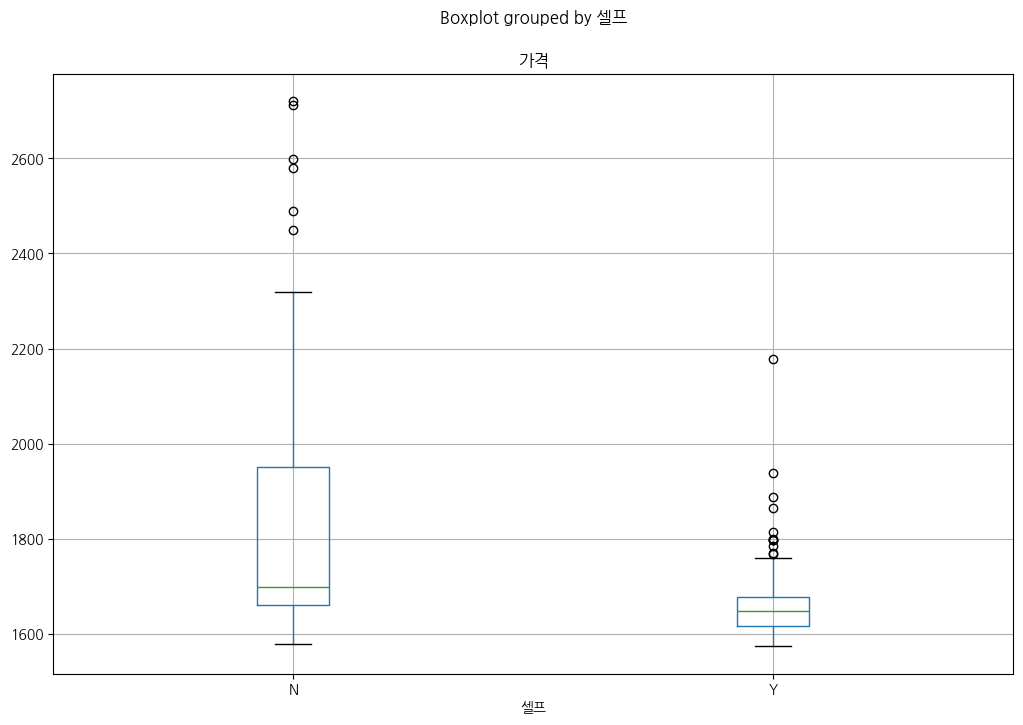

In [90]:
# 셀프 주유소에 대한 가격 시각화 -> 대체적으로 셀프 주유소의 가격이 더 싼 것을 볼 수 있음
stations.boxplot(column="가격", by="셀프", figsize=(12, 8))

다른 방법으로 시각화

C:\Users\emddj\AppData\Local\Temp\ipykernel_15568\3497209655.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="셀프", y="가격", data=stations, palette="Set1")


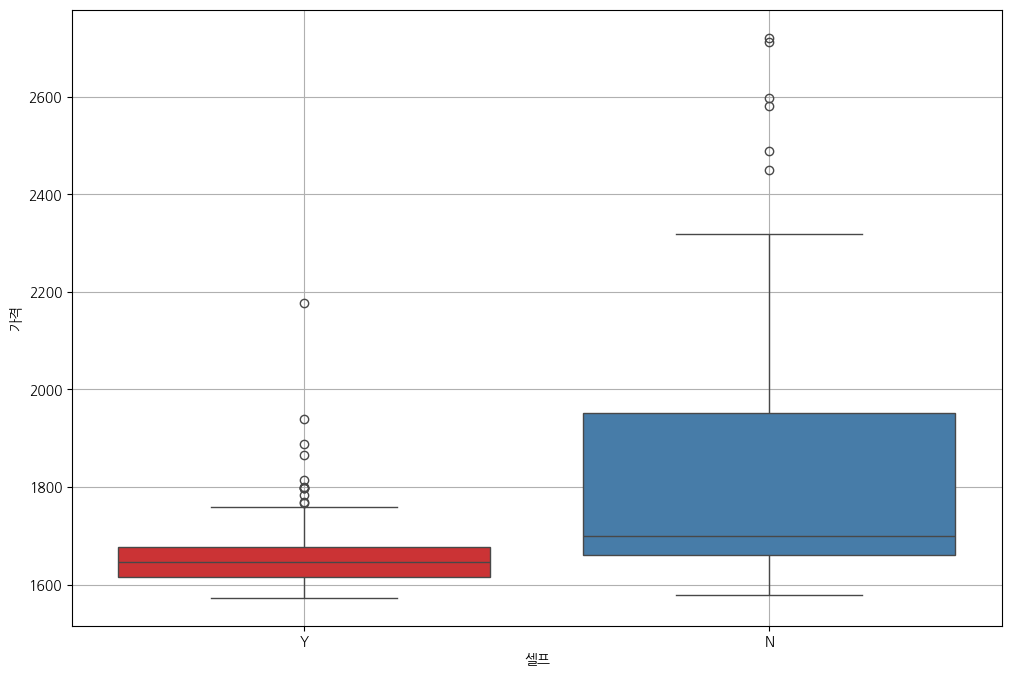

In [91]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x="셀프", y="가격", data=stations, palette="Set1")
plt.grid(True)
plt.show()

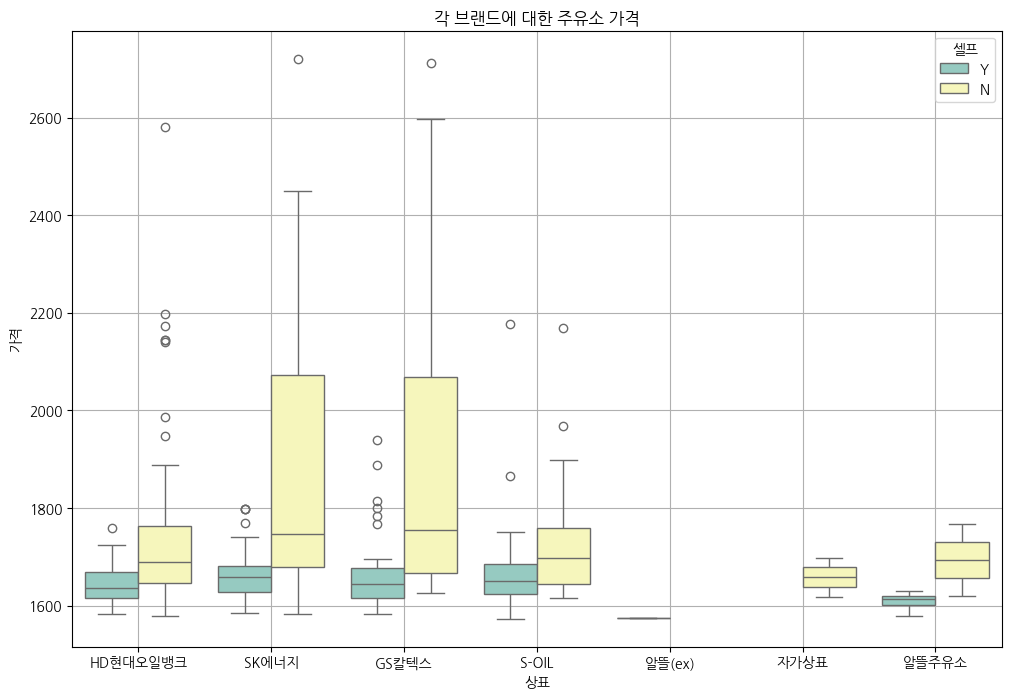

In [100]:
# 브랜드마다의 가격과 셀프 주유소인지 아닌지 구분도 지정해서 시각화
plt.figure(figsize=(12, 8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=stations, palette="Set3")
plt.grid(True)
plt.title('각 브랜드에 대한 주유소 가격')
plt.show()

### 지도 시각화

In [93]:
import json 
import folium
import warnings
# 경고 표시 무시하기
warnings.simplefilter(action="ignore", category=FutureWarning)

In [94]:
# 가장 비싼 주유소 10개 
stations.sort_values(by="가격", ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
274,서남주유소,서울 중구 통일로 30,2721.0,N,SK에너지,중구
240,서계주유소,서울 용산구 청파로 367 (청파동),2712.0,N,GS칼텍스,용산구
437,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598.0,N,GS칼텍스,강남구
436,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2580.0,N,HD현대오일뱅크,강남구
273,필동주유소,서울 중구 퇴계로 196 (필동2가),2489.0,N,GS칼텍스,중구
435,SK논현주유소,서울 강남구 논현로 747 (논현동),2450.0,N,SK에너지,강남구
239,한석주유소,서울 용산구 이촌로 164,2318.0,N,SK에너지,용산구
264,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2295.0,N,GS칼텍스,종로구
216,SJ오일(주) 여의도주유소,서울 영등포구 은행로 64,2295.0,N,GS칼텍스,영등포구
263,경복궁주유소,서울 종로구 율곡로 6 (중학동),2290.0,N,GS칼텍스,종로구


In [95]:
# 가장 값싼 주유소 10개 
stations.sort_values(by="가격", ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
99,(주)서울에너지 직영,서울 성동구 천호대로 324 (용답동),1573.0,Y,S-OIL,성동구
68,만남의광장주유소,서울 서초구 양재대로12길 73-71,1574.0,Y,알뜰(ex),서초구
41,(주)타이거통상 월드컵주유소,서울 마포구 월드컵북로 170 (성산제2동),1579.0,Y,S-OIL,마포구
288,화곡역주유소,서울 강서구 강서로 154 (화곡동),1579.0,Y,알뜰주유소,강서구
241,(주)디오티디 은평유니콘주유소,서울 은평구 통일로 1151 (진관동),1579.0,N,HD현대오일뱅크,은평구
289,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),1582.0,Y,HD현대오일뱅크,강서구
166,플라트(주)서호주유소,서울 양천구 남부순환로 317,1582.0,Y,GS칼텍스,양천구
167,신월주유소,서울 양천구 신월로 193 (신월동),1582.0,Y,GS칼텍스,양천구
168,현대주유소,서울 양천구 남부순환로 372 (신월동),1582.0,Y,S-OIL,양천구
169,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1582.0,N,SK에너지,양천구


In [96]:
# 각 구의 평균 가격 정보 담기
import numpy as np 

gu_data = pd.pivot_table(data=stations, index="구", values="가격", aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1919.500000
강동구,1737.214286
강북구,1618.250000
강서구,1672.303030
관악구,1695.928571


In [99]:
# 각 주유소의 평균 가격에 대한 지도 시각화
geo_path = '02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding="utf-8"))

my_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5)
folium.Choropleth(
    geo_data=geo_str,
    data=gu_data,
    columns=[gu_data.index, "가격"],
    key_on="feature.id",
    fill_color="PuRd"
).add_to(my_map)
my_map